In [142]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
# load data
df = pd.read_csv('crimerates-by-state-2005.csv')
df.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7,295753151
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221


In [144]:
# view data
df.describe()

,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01
mean,5.321154,33.690385,114.432692,269.805769,691.196154,2303.155769,383.859615,1.137512e+07
std,4.845913,11.169167,96.963180,144.917580,231.517880,509.664215,249.597665,4.072533e+07
min,1.100000,13.900000,7.400000,61.700000,311.900000,1343.700000,102.000000,5.062420e+05
25%,2.650000,26.375000,67.400000,153.450000,493.600000,1895.525000,222.725000,1.670256e+06
50%,4.800000,32.550000,98.950000,237.350000,669.300000,2353.150000,322.950000,4.219246e+06
75%,6.700000,39.950000,152.350000,361.850000,921.350000,2698.975000,421.275000,6.730745e+06
max,35.400000,81.100000,672.100000,721.300000,1201.100000,3308.400000,1402.300000,2.957532e+08


In [145]:
# remove unwanted columns, save file
df = df[df.state != 'District of Columbia']
df = df[df.state != 'United States']
df.to_csv('state_crime_rates_each.csv', index=False)

In [140]:
# select a few columns
df_short = df.drop(['murder', 'aggravated_assault', 'larceny_theft'], axis=1)

In [141]:
# re stack data
df_short = df_short.set_index(['state',
                   'population']).stack().rename_axis(('state',
                                                       'population',
                                                       'crime')).reset_index().rename(columns={0:'count'})
df_short.to_csv('state_crime_rates.csv', index=False)

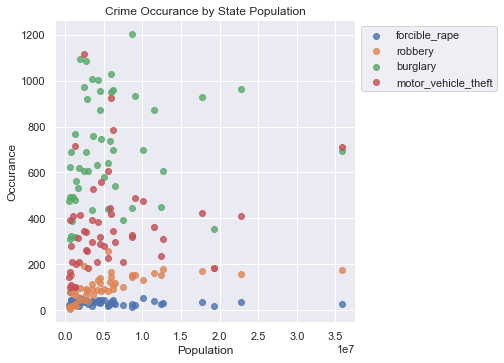

In [103]:
sns.set(style="darkgrid")
# create scatter plot with categories
ax = sns.lmplot( x="population", y="count", data=df_short, fit_reg=False, hue='crime', legend=False)
ax.set(ylabel='Occurance', xlabel='Population') 
plt.title('Crime Occurance by State Population')
# Move the legend to an empty part of the plot
plt.legend(bbox_to_anchor=(1, 1), loc=2)


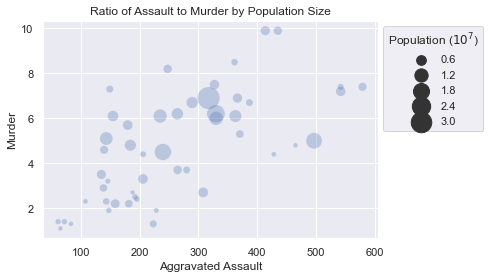

In [135]:
# create bubble plot
ax = sns.scatterplot(x='aggravated_assault', y='murder', size='population',
                sizes=(20,500), alpha=0.3, data=df)
ax.set(xlabel='Aggravated Assault', ylabel='Murder') 
plt.title('Ratio of Assault to Murder by Population Size')
plt.legend(bbox_to_anchor=(1, 1), loc=2, title='Population ($10^{7}$)')

Text(0.5, 1.0, 'Density of Murder Occurance')

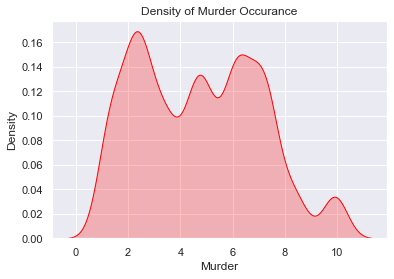

In [113]:
# create density plot
ax = sns.kdeplot(df['murder'], shade=True, bw_method=.20, color='red')
ax.set(xlabel='Murder', ylabel='Density') 
plt.title('Density of Murder Occurance')